<a href="https://colab.research.google.com/github/ALOK158/Neural_Network_TensorFlow/blob/main/Module_1_Neural_Network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regresion Model with neural network via tensorflow

In leyman is use to predict numbers


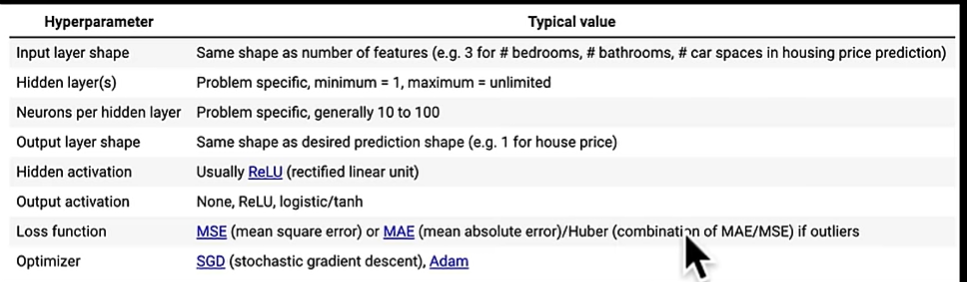

In [1]:
#Import TEnsroflow
import tensorflow as tf
print(tf.__version__)

2.17.1


###Create data to view and fit

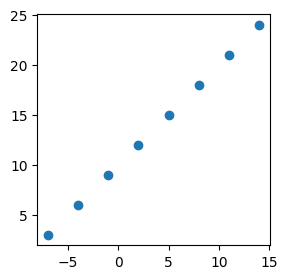

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#Create Features
X=np.array([-7,-4,-1,2,5,8,11,14])
Y=np.array([3,6,9,12,15,18,21,24])

#visualize it
plt.figure(figsize=(3, 3))
plt.scatter(X,Y)


###Input and Output Shapes

In [3]:
#create demo tensor for housing problem
house_info=tf.constant(['bedroom','bathroom','garage'])
house_price=tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
input_shape=X.shape
output_shape=Y.shape
input_shape, output_shape

((8,), (8,))

In [5]:
##But do we need that much in out putputshape- 8 diifent enties
#We need just one entities to predict the Y

In [6]:
input_shape=X[0].shape
output_shape=Y[0].shape
X[0].ndim

0

In [7]:
# Turn our numpy into tensor
X=tf.constant(X)
Y=tf.constant(Y)
X=tf.cast(X, dtype=tf.float32)
Y=tf.cast(Y, dtype=tf.float32)

In [8]:
input_shape=X[0].shape
output_shape=Y[0].shape
X[0].ndim
# nodeimension->Scalar value

0

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

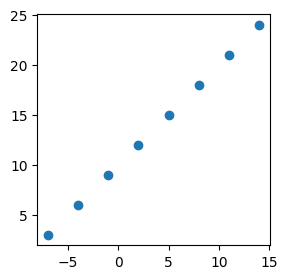

In [9]:
plt.figure(figsize=(3,3))
plt.scatter(X,Y)
X,Y

##Steps in modelling with Tensorflow

1.Creating the model-define the input and output layers as well as hidden layers of deep learning model

2.Compiling the model-define loss fucntion(in other words it tells the uptop what extent it needs to improve/modify itself) and optimizer(tells our model how to improve the patters it is learning ) and evaluation matrics(tells how well our model is)

3.Fitiing a model-letting the mdoel to try to find pattterns between X and Y(features and labels)

In [10]:
# SET THE RANDOM SEED
tf.random.set_seed(42)
#Create a model using the Sequential API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#2 compile the model
model.compile(loss=tf.keras.losses.mae,  ##mae= mean absoilute error
              optimizer=tf.keras.optimizers.SGD(), ##Stochastic Gradient Descent
              metrics=["mae"])
#3 Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)



Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 21.6165 - mae: 21.6165
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step - loss: 21.2234 - mae: 21.2234
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 20.8303 - mae: 20.8303
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 20.4622 - mae: 20.4622
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 20.1810 - mae: 20.1810


In [11]:
#ALternate method to create the model
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1)) ## or .Dense(no. of layers, input_shape(16,0))

In [12]:
#check out X and Y
X,Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
#4Try and make the prediction
v=np.array([[17.0]])# we canonot just give interger directly
model.predict(v)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


array([[15.737797]], dtype=float32)

###### so prdected outcome is very off
###### Now how to improve this


###Improving the model

We can improve our model, by alternating the steps we have used to create the model

1.Creating the mode
    Add more layers,increase the hidden layers,change the activation fucntion

2.Compiling the model    
    We can change the optimizer fucntion and its learning rate too

3.Fitting the model
    Can incraese the no. of epochs and the more data

    
        

In [14]:
#lets rebuild the model
# create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)

])
# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#Evalue the model
model.fit(tf.expand_dims(X,axis=1),Y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 17.0763 - mae: 17.0763
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 16.7951 - mae: 16.7951
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 16.5138 - mae: 16.5138
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 16.2326 - mae: 16.2326
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 15.9513 - mae: 15.9513
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 15.6701 - mae: 15.6701
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 15.3888 - mae: 15.3888
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - loss: 15.1076 - mae: 15.1076
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 14.8542 - mae: 14.8542
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 14.7217 - mae: 14.7217
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 14.5892 - mae: 14.5892
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 14.4567 - mae: 14.4567
Epoch 13/100
1/1 ━━

In [15]:
X,Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
##predicting the
i=np.array([[17]])
model.predict(i)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


array([[29.730986]], dtype=float32)

In [17]:
## Trying to omprove the model further
#1 Crate the mode
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
#2 Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
#3Fit the model

model.fit(tf.expand_dims(X,axis=1), Y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.6852 - mae: 13.6852
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - loss: 13.0805 - mae: 13.0805
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.4804 - mae: 12.4804
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.8859 - mae: 11.8859
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.3011 - mae: 11.3011
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10.7346 - mae: 10.7346
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.1689 - mae: 10.1689
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 9.5949 - mae: 9.5949
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 9.0138 - mae: 9.0138
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.4265 - mae: 8.4265
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.9172 - mae: 7.9172
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.4197 - mae: 7.4197
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [18]:
##predicting the
i=np.array([[17]])
model.predict(i)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


array([[26.820457]], dtype=float32)

####Common ways to improve the model

1.Adding the layers

2.Trying to change the activation function

3.Loss fucntion, Optimizer,metric, Epoch

4.**Learning rate**- Most important hyperparameter to imporve the model

In [19]:
## So even the loss got reduce even though prediction is very low
## TH model is getting overfitting on test data

##Evaluating the model
In practise a typical workflow you will go through when a building the model

```
Build the model->fit->evaluate it->tweak the model->fir it->evaluate it


###When it comes to evluatione... there are three main points to consider
"Visualize, Visualize, Visualize"

It is good to visualize:
*The data-

*The model itself-how does our model
look like

*The traianing model-how model performs while it runs

*The predictions of model-How well is model is predicting against the ground truth

In [20]:
# Make a bigger dataset
X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [21]:
#Make the label for dataset
Y=X+10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

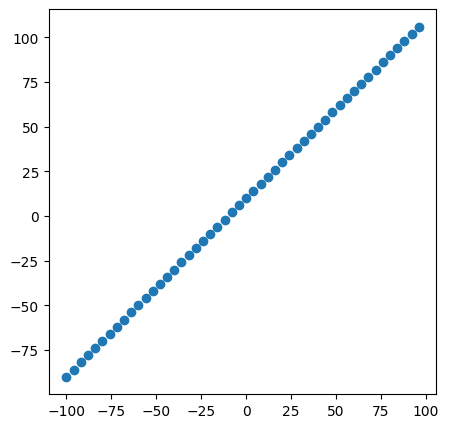

In [22]:
##Visualize the data
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(X,Y)

### the three datasets
Training set-Model learns from this data

Validation set-MOdel gets tuned on this data-20% of available dataset

Test Set-Model gets evaluated on this dataset,10-15% of the data set




In [23]:
#Check the length of how many we had
len(X)

50

In [24]:
#Split the data into train and test set
X_train=X[:40]
Y_train=Y[:40]
X_test=X[40:]
Y_test=Y[40:]
len(X_train),len(Y_train)

(40, 40)

#Visualiseing the data

Now lets visualize our data

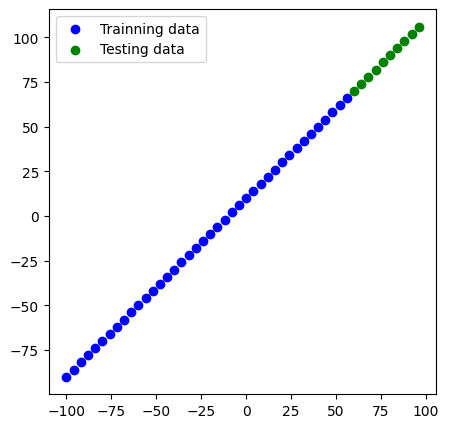

In [25]:
plt.figure(figsize=(5,5))
plt.scatter(X_train,Y_train, c='b', label="Trainning data")
plt.scatter(X_test,Y_test, c='g', label="Testing data")
#Show legend
plt.legend()

In [26]:
###Lets buld the model
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(520,activation="relu",name="L1"),
    tf.keras.layers.Dense(240,activation="relu",name="L2"),
    tf.keras.layers.Dense(1)
])
# compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
##Fit the model
model.fit(tf.expand_dims(X_train,axis=1),Y_train,epochs=15)

##Evaluate the mdoel


Epoch 1/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 815ms/step - loss: 37.4797 - mae: 37.4797
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 20.0319 - mae: 20.0319
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.9934 - mae: 7.9934
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.5543 - mae: 7.5543
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.7648 - mae: 5.7648
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.2569 - mae: 6.2569
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.3705 - mae: 5.3705 
Epoch 8/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.2009 - mae: 7.2009
Epoch 9/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.9871 - mae: 3.9871 
Epoch 10/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.2133 - mae: 4.2133 
Epoch 11/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.6329 - mae: 3.6329 
Epoch 12/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8044 - mae: 3.8044 
Epoch 13/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss

In [27]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ L1 (Dense)                           │ (None, 520)                 │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L2 (Dense)                           │ (None, 240)                 │         125,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 378,965 (1.45 MB)

 Trainable params: 126,321 (493.44 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 252,644 (986.89 KB)

#Visusalize the mdoel


In [28]:
#lets create the model which builds automatically by defining the input_shape argument in first layer
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1]),
])
#Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

*  Total params-total no. of paramters in the system
*   Trainable para-these are parameters is that model that be update while traning->Non trainable para??
*    Non-Trainable Para-these parameters
are not get updated(typically when you bring other parameters from other model while **transfer learning**)

Can check out MIT's-Deep learning

In [30]:
###Lets buld the model
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(520,activation="relu", name="L1"),#Can name every layer
    tf.keras.layers.Dense(240,activation="relu", name="L2"),
    tf.keras.layers.Dense(1)
])
# compile the mkode
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
##Fit the model
model.fit(tf.expand_dims(X_train,axis=1),Y_train,epochs=100, verbose=1)

##Evaluate the mdoel


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 314ms/step - loss: 37.9421 - mae: 37.9421
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.3333 - mae: 9.3333  
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.5650 - mae: 6.5650 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.7378 - mae: 10.7378 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.0483 - mae: 15.0483 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.2846 - mae: 9.2846 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.8448 - mae: 10.8448 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.9721 - mae: 5.9721 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.6553 - mae: 7.6553 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1765 - mae: 5.1765 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.5158 - mae: 7.5158 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.5628 - mae: 5.5628 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0

In [31]:
#Get the summary of the model
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ L1 (Dense)                           │ (None, 520)                 │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ L2 (Dense)                           │ (None, 240)                 │         125,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 378,965 (1.45 MB)

 Trainable params: 126,321 (493.44 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 252,644 (986.89 KB)

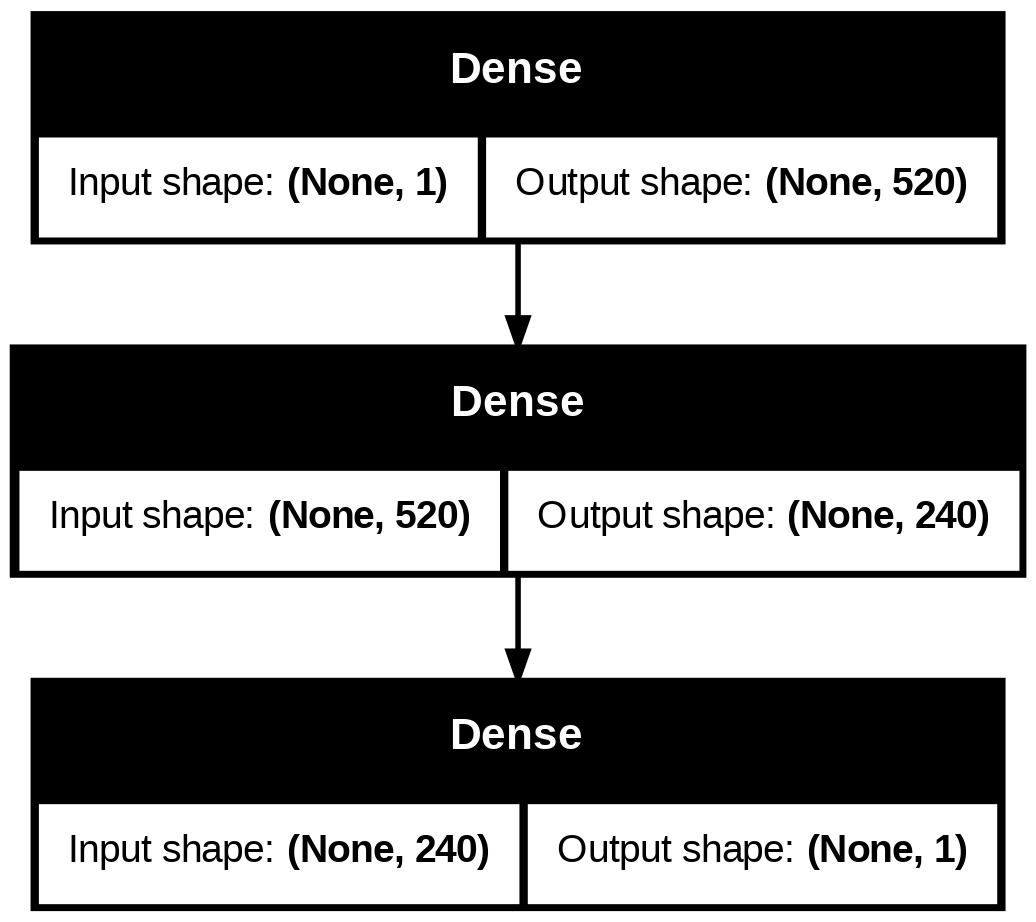

<Figure size 100x100 with 0 Axes>

In [32]:
from tensorflow.keras.utils import plot_model
plt.figure(figsize=(1,1))
plot_model(model, show_shapes=True)

##VIsualizing the model Predictions

To  visualize the predictions, it would be good idea to plot it againt the ground truth labels

IN form of Y_true vs Y_pred(True vs Predcition model)

In [33]:
#
Y_P=model.predict(X_test)
len(Y_P), len(Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


(10, 10)

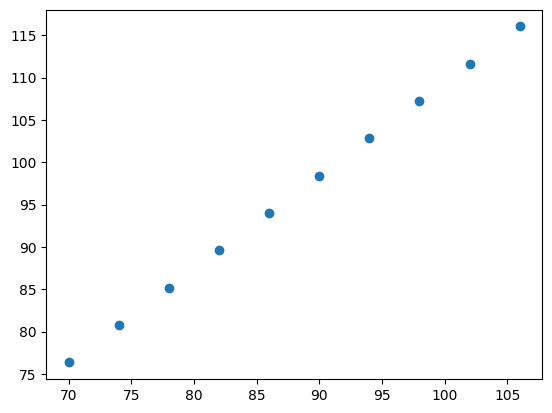

In [34]:
plt.scatter(Y_test,Y_P)

In [35]:
# Lets have a plotting fucntion
def plot_pred(train_data,train_labels,test_data,test_labels,predcition):
  """
  plot traing data , test data and compare prediciton to actual value
  """
  plt.figure(figsize=(5,5))
  #Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  #plot testing data in green
  plt.scatter(test_data,test_labels,c='g',label="Testing data")
  #plot model prediction in red
  plt.scatter(test_data,predcition,c="r",label="Prediciton")
  #show legend
  plt.legend()





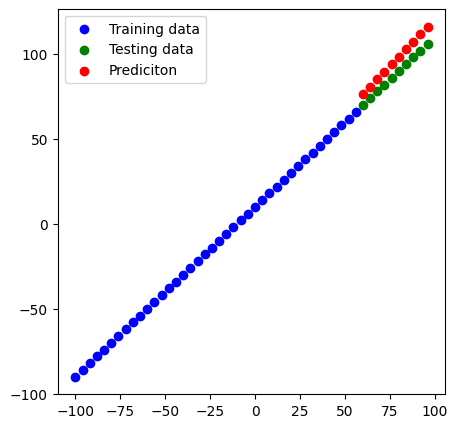

In [36]:
plot_pred(X_train,Y_train,X_test,Y_test,Y_P)

###Evaluatiing our model using Evalutaion Metrics

Depending on problem you working on there are different types of evalutaing metrics that need to implement

Since we are working on regression model there are two metrics

*MAE-Mean Absolute Error

*MSE -Mean Squared Error


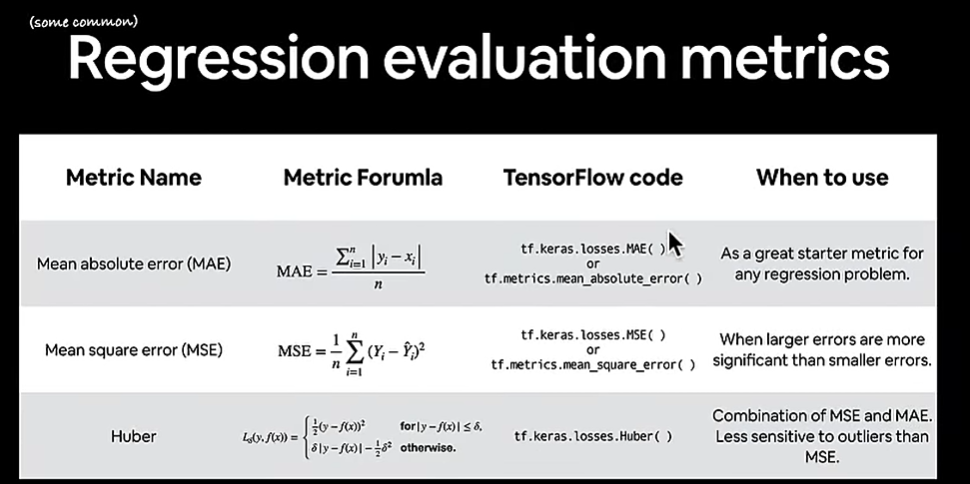

In [37]:
#Evaluate the model on
model.evaluate(X_test,Y_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - loss: 8.1922 - mae: 8.1922


[8.19222354888916, 8.19222354888916]

In [38]:
Y_test, Y_P
#Both are in different
Y_P2=tf.constant(Y_P)
Y_P2,Y_test#-> both are in differn shape, trying to squezze the Y_P2
Y_P2=tf.squeeze(Y_P2)
Y_P2

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 76.35921 ,  80.76682 ,  85.174194,  89.58156 ,  93.98895 ,
        98.3963  , 102.803604, 107.210846, 111.61726 , 116.02348 ],
      dtype=float32)>

In [39]:
#Calculae the  MAE of Y_P and Y_test
tf.keras.losses.MAE(Y_test,Y_P)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 6.359207 ,  6.766823 ,  7.1741943,  7.581558 ,  7.9889526,
        8.396301 ,  8.803604 ,  9.210846 ,  9.617264 , 10.023483 ],
      dtype=float32)>

In [40]:
### We didnot get the MAE of over all, instead we got an array
## So we have checked the Y_test, and Y_P->different shape
#Now we squeezed the Y_P->Y_P2  and make them in same format
#Calculae the  MAE of Y_P2 and Y_test
tf.keras.losses.MAE(Y_test,Y_P2)

<tf.Tensor: shape=(), dtype=float32, numpy=8.192224>

In [41]:
tf.keras.losses.MSE(Y_test,Y_P2)


<tf.Tensor: shape=(), dtype=float32, numpy=68.480484>

In [42]:
# make some fucntion to resuse MAE and MSE
def mae(Y_t,y_p):
  y_p=tf.constant(y_p)
  y_p=tf.squeeze(y_p)
  return tf.keras.losses.MAE(Y_t,y_p)
def mse(y_t,y_p):
  y_p=tf.constant(y_p)
  y_p=tf.squeeze(y_p)
  return tf.keras.losses.MSE(y_t,y_p)



###Runing Experiments to improve the model

```
build model->fit it->evaluate it->improve model->fit it->evaluate it

```

Improve the model

1.Get more data-Better traianing

2.Biggere Architecure of Model

3.Train for longer

lets do 3 modelling experiment

1.model_1=1 layer-100 epochs

2.model_2=2 layers-200 epochs

3.model_3=2 layers-500 epochs

In [43]:
X_train,Y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [44]:
#MODEl!
tf.random.set_seed(42)
#bulid the model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])
#compile the model
model_1.compile(loss=tf.keras.losses.MSE,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["mae"])
#fit the model
model_1.fit(tf.expand_dims(X_train,axis=1),Y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 478ms/step - loss: 3689.5806 - mae: 52.1004
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3397.2920 - mae: 50.0257 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3118.5315 - mae: 47.9624 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2853.3931 - mae: 45.9097 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2602.0769 - mae: 43.8708
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2364.7192 - mae: 41.8492
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2141.3657 - mae: 39.8479 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1931.9771 - mae: 37.8700 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1736.4403 - mae: 35.9184
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1554.5757 - mae: 34.0078 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1386.1415 - mae: 32.1475 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1230.8390 - mae: 30.3216 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


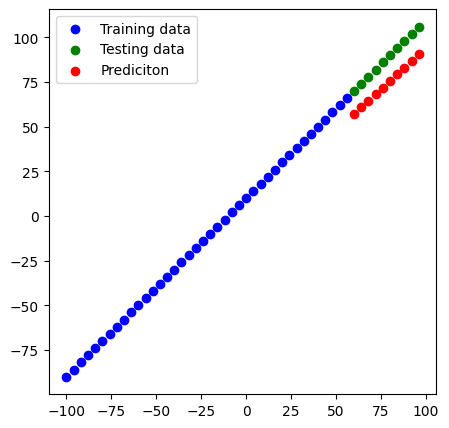

In [45]:
#Make and plot prediction for model 1
y_p_1=model_1.predict(tf.expand_dims(X_test,axis=1))
plot_pred(X_train,Y_train,X_test,Y_test,y_p_1)

In [46]:
#Calcualte the Evaluation metrics
mae_1=mae(Y_test,y_p_1)
mse_1=mse(Y_test,y_p_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.180555>,
 <tf.Tensor: shape=(), dtype=float32, numpy=201.80453>)

In [47]:
#MODEl_2
tf.random.set_seed(42)
#bulid the model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1024,activation="relu"),
    tf.keras.layers.Dense(240,activation="relu"),
    tf.keras.layers.Dense(1)
])
#compile the model
model_2.compile(loss=tf.keras.losses.MSE,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["mae"])
#fit the model
model_2.fit(tf.expand_dims(X_train,axis=1),Y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 570ms/step - loss: 2258.4822 - mae: 40.8926
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 965.5225 - mae: 26.8029  
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 397.5752 - mae: 17.0583 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 138.8605 - mae: 9.5388 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 95.8354 - mae: 9.6908 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 132.0422 - mae: 10.2049 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 137.1270 - mae: 10.9067 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 110.6459 - mae: 9.6933 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 88.8243 - mae: 7.0766
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 85.8494 - mae: 7.1900 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 84.2065 - mae: 7.5615 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 66.9943 - mae: 6.8985 
Epoch 13/100
2/2 ━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


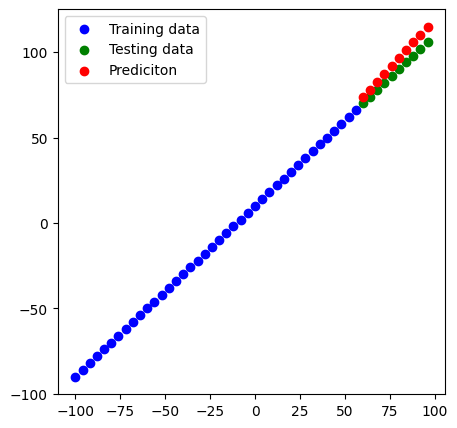

In [48]:
## cal. the evalutaion  metrics and plot it
y_p_2=model_2.predict(tf.expand_dims(X_test,axis=1))
plot_pred(X_train,Y_train,X_test,Y_test,y_p_2)

In [49]:
# Calcualte model_2 Evaluation metrics
mae_2=mae(Y_test,y_p_2)
mse_2=mse(Y_test,y_p_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=6.2187867>,
 <tf.Tensor: shape=(), dtype=float32, numpy=41.626404>)

In [50]:
#MODEl!
tf.random.set_seed(42)
#bulid the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(1024,activation="relu"),
    tf.keras.layers.Dense(240,activation="relu"),
    tf.keras.layers.Dense(1)
])
#compile the model
model_3.compile(loss=tf.keras.losses.MSE,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["mae"])
#fit the model
model_3.fit(tf.expand_dims(X_train,axis=1),Y_train,epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 342ms/step - loss: 2190.1909 - mae: 40.2655
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1065.1262 - mae: 28.1622 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 491.3814 - mae: 19.2811 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 162.5979 - mae: 11.1936 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 39.5346 - mae: 5.5754 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70.3115 - mae: 7.8248 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 126.9134 - mae: 10.6198 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 126.7138 - mae: 10.2729 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 93.4667 - mae: 7.7476  
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72.4597 - mae: 6.5605 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 65.7050 - mae: 6.7488 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 52.1032 - mae: 6.1681 
Epoch 13/500
2/2 ━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


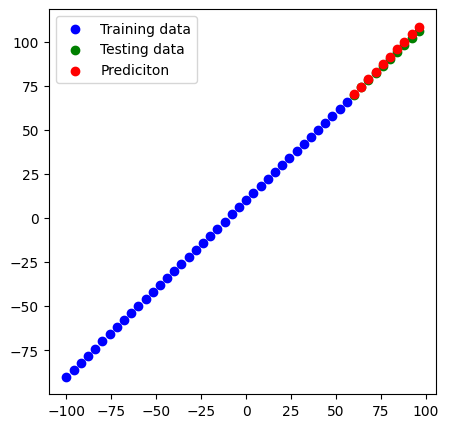

In [51]:
## cal. the evalutaion  metrics and plot it
y_p_3=model_3.predict(tf.expand_dims(X_test,axis=1))
plot_pred(X_train,Y_train,X_test,Y_test,y_p_3)

In [52]:
#Calcualte the Evaluation metrics
mae_3=mae(Y_test,y_p_3)
mse_3=mse(Y_test,y_p_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=1.2294014>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.0520508>)

In [53]:
#Calcualte the Evaluation metrics
mae_3=mae(Y_test,y_p_3)
mse_3=mse(Y_test,y_p_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=1.2294014>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.0520508>)

***NOTE***- Start with small model and make sure they work and  graduaally  increase the model complexity

###Comparing th results of our experiments

Lets compare the three models

In [54]:
#lets comapre our model's result using pandas DataFRame
import pandas as pd

model_results=[["model_1",mae_1.numpy(),mse_1.numpy()],
               ["model_2",mae_2.numpy(),mse_2.numpy()],
               ["model_3",mae_3.numpy() ,mse_3.numpy()]]

model_results=pd.DataFrame(model_results,columns=["model","mae","mse"])
model_results

,model,mae,mse
0,model_1,14.180555,201.804535
1,model_2,6.218787,41.626404
2,model_3,1.229401,2.052051


**Note**-More the expermiments , more things you will figure out what does and what doesnot worked
Machine Leaning Expert motto-"Experiment, Experiment,Experiment"

 ### Tracking your Expremients

 One  really good habit in ML modelling it to track ur experiments

 And when doing so, it can be tedious if you are running lots of experiments

 Luckily, there are tools to help ur!

 **Resources** As you build more tools, you wanna to look into using:

 * Tensorboard- a component of Tensorflow library to help track modelling the experiments
 * Weights and Biases- a tool to tracking all kinds of ML experiments(can easily plug in with TensorFLow)

##Saving our models
Saving our models allow us to it outside the googleCollab such as web application or mobile app


There are two main formats to save our model:
* The new .keras format
* THe Save Model Format
* The HDF5 format

In [55]:
# Save model using  modek format
!mkdir -p saved_model
tf.saved_model.save(model_2, 'saved_model/model_2_saved_as_model')

In [56]:
#Saving the model in HDF5 format->Universal Format
model_2.save("my_model_h.h5")

In [57]:
##Loading the saved model
loaded_hdf5model=tf.keras.models.load_model("/content/my_model_h.h5")
loaded_hdf5model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 1024)                │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 240)                 │         246,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │             241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 248,291 (969.89 KB)

 Trainable params: 248,289 (969.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [58]:
model_2.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 1024)                │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 240)                 │         246,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │             241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 744,869 (2.84 MB)

 Trainable params: 248,289 (969.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 496,580 (1.89 MB)

In [59]:
# Via keras mehtod
model_2.save('my_model_k.keras')

In [60]:
## Load the save model
m_k=tf.keras.models.load_model('my_model_k.keras')
m_k.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 1024)                │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 240)                 │         246,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │             241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 496,580 (1.89 MB)

 Trainable params: 248,289 (969.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 248,291 (969.89 KB)

In [61]:
#compare the model
m_k.evaluate(X_test,Y_test), model_2.evaluate(X_test,Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step - loss: 41.6264 - mae: 6.2188
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - loss: 41.6264 - mae: 6.2188


([41.626407623291016, 6.218786716461182],
 [41.626407623291016, 6.218786716461182])

##Download the model or any other file from G.collab

If you want to download any file from collab:

1.Can do Directly from files tab and download directly from it.

2.Can use the code (cell below)

3.Can save it in google drive
and copying it there(2nd code cell below)




In [62]:
#Download  from google collab

from google.colab import files
files.download("/content/my_model_k.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [63]:
# save a file from google collab to drive (requres mounting google drive)
!cp /content/my_model_k.keras /content/drive/MyDrive/TensorFlow

In [64]:
!ls /content/drive/MyDrive/TensorFlow

my_model_k.keras


##A larger example

[Medical Cost Personal](https://www.kaggle.com/datasets/mirichoi0218/insurance)


In [65]:
# import the required library
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [66]:
# Read the insurace data set
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance.shape, insurance.head(5)

((1338, 7),
    age     sex     bmi  children smoker     region      charges
 0   19  female  27.900         0    yes  southwest  16884.92400
 1   18    male  33.770         1     no  southeast   1725.55230
 2   28    male  33.000         3     no  southeast   4449.46200
 3   33    male  22.705         0     no  northwest  21984.47061
 4   32    male  28.880         0     no  northwest   3866.85520)

In [67]:
insurance.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


So there are many object type dataset like sex, region->need to be in numeric datatype

One way ->**ONE HOT ENCODING** via pandaDataFRame

In [68]:
#One hot encode dataFRame to all data in numeric type
insurance_1=pd.get_dummies(insurance,dtype=int)
insurance_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   int64  
 5   sex_male          1338 non-null   int64  
 6   smoker_no         1338 non-null   int64  
 7   smoker_yes        1338 non-null   int64  
 8   region_northeast  1338 non-null   int64  
 9   region_northwest  1338 non-null   int64  
 10  region_southeast  1338 non-null   int64  
 11  region_southwest  1338 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 125.6 KB


In [69]:
# create X and Y(featues and labels)
#create training and tets sets
X=insurance_1.drop("charges", axis=1)
Y=insurance_1["charges"]
X.info(), Y.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   sex_female        1338 non-null   int64  
 4   sex_male          1338 non-null   int64  
 5   smoker_no         1338 non-null   int64  
 6   smoker_yes        1338 non-null   int64  
 7   region_northeast  1338 non-null   int64  
 8   region_northwest  1338 non-null   int64  
 9   region_southeast  1338 non-null   int64  
 10  region_southwest  1338 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 115.1 KB


(None,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 Name: charges, dtype: float64)

In [70]:
#Create traning and test dataset
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape



((1070, 11), (268, 11), (1070,), (268,))

In [71]:
# Lets crate our model Architecture
tf.random.set_seed(42)

#model
model_m=tf.keras.Sequential([
    tf.keras.layers.Dense(1042),
    tf.keras.layers.Dense(520),
    tf.keras.layers.Dense(240),
    tf.keras.layers.Dense(1)
])
#Compile the model
model_m.compile(loss=tf.keras.losses.Huber(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["mae"])
#Fit the model
model_m.fit(X_train,Y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 13219.0908 - mae: 13219.5908
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12543.7627 - mae: 12544.2627
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10262.2588 - mae: 10262.7588
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7489.9629 - mae: 7490.4629
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7287.1060 - mae: 7287.6060
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7229.7666 - mae: 7230.2666
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7169.6689 - mae: 7170.1689
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7106.9766 - mae: 7107.4766
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7044.2959 - mae: 7044.7959
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6978.6704 - mae: 6979.1704
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6912.2812 - mae: 6912.7812
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

In [72]:
#Evalautaion
model_m.evaluate(X_test,Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 3620.5269 - mae: 3621.0269


[3552.230224609375, 3552.730224609375]

Right now model is not performing good enough
lets improve it

In [74]:
##create the model
model_m1=tf.keras.Sequential([
    tf.keras.layers.Dense(1024,activation="relu"),
    tf.keras.layers.Dense(520,activation="relu"),
    tf.keras.layers.Dense(240,activation="relu"),
    tf.keras.layers.Dense(120,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(8,activation="relu"),
    tf.keras.layers.Dense(1)
])
#Compile it
model_m1.compile(loss=tf.keras.losses.MAE,
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                 metrics=["mae"])
#Fit the model
history=model_m1.fit(X_train,Y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 13295.6240 - mae: 13295.6240
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13268.0449 - mae: 13268.0449
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13131.5781 - mae: 13131.5781
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12526.3047 - mae: 12526.3047
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10480.9961 - mae: 10480.9961
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7599.2681 - mae: 7599.2681
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7353.6167 - mae: 7353.6167
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7301.3755 - mae: 7301.3755
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7253.7104 - mae: 7253.7104
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7205.5986 - mae: 7205.5986
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7159.2808 - mae: 7159.2808
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━

Text(0.5, 0, 'Epochs')

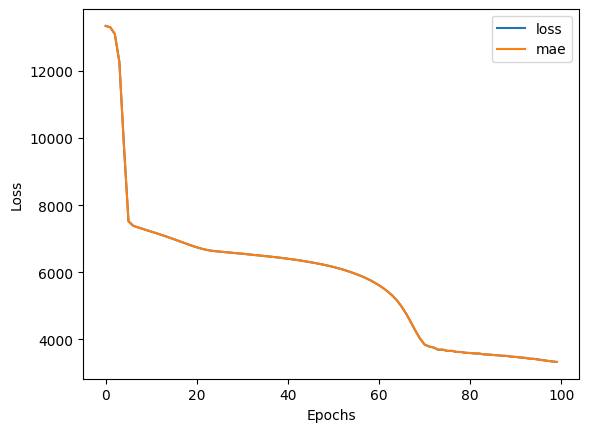

In [75]:
#plot history(also known as loss curve or a trainaing curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")


**Question**-> how long should we trained for

It depends on the problem you are working on. However,eveyone is curious about that

TensoFlow has a solution! It is called **Early Stopping Callback**, which is tensorFLow component you can add to your model to stop traininng  once it start improving a certain metric

## Preprocessing data(Normalization and Standardization)

In terms of scalling ,Neural Networks use to prefer Normalization

In [78]:
X_train.head(5)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,1,0,1,0,0,1,0,0
1285,47,24.32,0,1,0,1,0,1,0,0,0
1142,52,24.86,0,1,0,1,0,0,0,1,0
969,39,34.32,5,1,0,1,0,0,0,1,0
486,54,21.47,3,1,0,1,0,0,1,0,0


<Axes: ylabel='Frequency'>

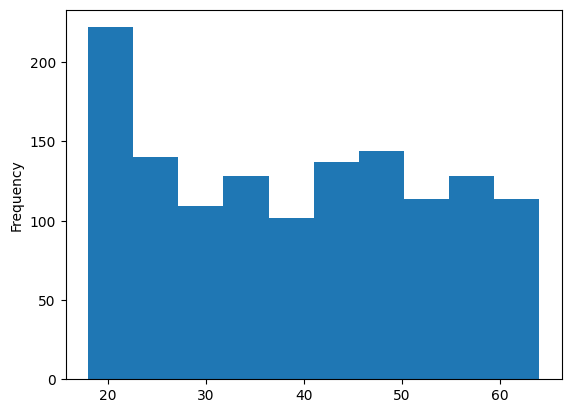

In [79]:
X["age"].plot(kind="hist")

**Feature Scalling**

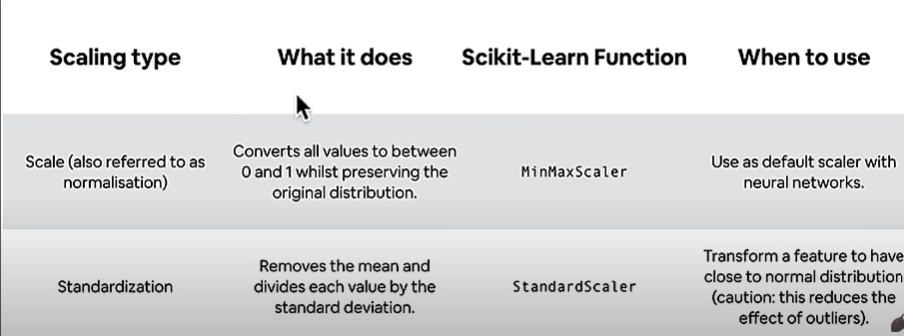

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

##Read the insurance dataset
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")

To prepare our data we can borrow few classes from SKlearn

In [98]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

#Create a column transformer
ct=make_column_transformer((MinMaxScaler(),["age","bmi","children"]),# turns all data of these column betwenn 0 and 1
                            (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
                           )
#Create X and Y
X=insurance.drop("charges", axis=1)
Y=insurance["charges"]

#Build Our train and test sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

#Fit the column transformer to our trainaing data()
ct.fit(X_train)

#transform  traning data with normalization
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)

In [90]:
# What doest our data look like now
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

Our data has been normalized and one hot encoded
now lets build tensorFlow neural Netowkr model on it

In [95]:
# Building the model
tf.random.set_seed(42)
model_n=tf.keras.Sequential([
    tf.keras.layers.Dense(1024,activation="relu"),
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(1)
])
#Compile the model
model_n.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["mae"])

#Fit the model
history_n=model_n.fit(X_train_normal,Y_train,epochs=150)

Epoch 1/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - loss: 13236.0303 - mae: 13236.0303
Epoch 2/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8729.7021 - mae: 8729.7021
Epoch 3/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6326.0869 - mae: 6326.0869
Epoch 4/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4092.1572 - mae: 4092.1572
Epoch 5/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3509.7983 - mae: 3509.7983
Epoch 6/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3458.0166 - mae: 3458.0166
Epoch 7/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3314.3750 - mae: 3314.3750
Epoch 8/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3348.0540 - mae: 3348.0540
Epoch 9/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3166.0251 - mae: 3166.0251
Epoch 10/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3109.4749 - mae: 3109.4749
Epoch 11/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3090.6777 - mae: 3090.6777
Epoch 12/150
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

Text(0.5, 0, 'epochs')

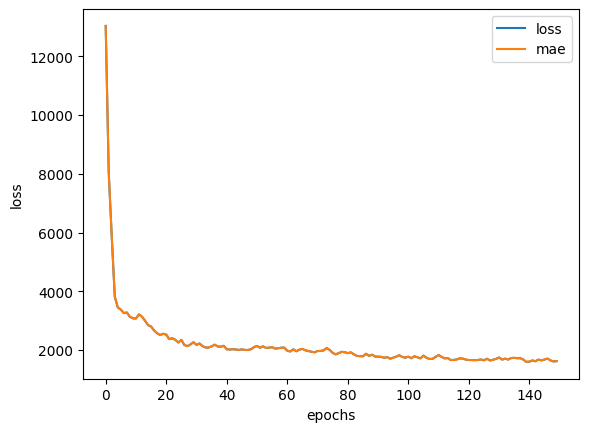

In [96]:
pd.DataFrame(history_n.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [99]:
#Evaluate the error
model_n.evaluate(X_test_normal,Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 1425.6531 - mae: 1425.6531


[1512.6466064453125, 1512.6466064453125]